# EDA and Modelling
---

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 100) # More readable pandas output for huge column sizes

### Useful Functions

Here is our function for our stopwords

In [2]:
stopwords = nltk.corpus.stopwords.words('english') # These are our stop words

This function removes punctuations, before tokenizing our text and then stemming the text after we removed stopwords.

In [3]:
ps = nltk.PorterStemmer()

def clean_text_stem(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    # \W matches any non-word character (equivalent to [^a-zA-Z0-9_]). This does not include spaces i.e. \s
    # Add a + just in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text) # This function removes punctuations, before tokenizing our text and then stemming the text.
    
    # apply stemming and stopwords exclusion within the same step
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# Text Cleaner using stem method

This function removes punctuations, before tokenizing our text and then lemmatizing the text after we removed stopwords.

In [4]:
wn = nltk.WordNetLemmatizer()

def clean_text_lemmatize(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    # \W matches any non-word character (equivalent to [^a-zA-Z0-9_]). This does not include spaces i.e. \s
    # Add a + just in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text)
    
    # apply lemmatize and stopwords exclusion within the same step
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

This function removes punctuations, before tokenizing our text and then lemmatizing the text after we removed stopwords.

The stopwords for this function can be adjusted in this particular function, compared to the previous ones. This needs to have a list add_stopwords declared before using.

In [5]:


def clean_text_lemmatize_more_stopwords(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    # \W matches any non-word character (equivalent to [^a-zA-Z0-9_]). This does not include spaces i.e. \s
    # Add a + just in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text)
    
    # apply lemmatize and stopwords exclusion within the same step
    text = [wn.lemmatize(word) for word in tokens if word not in add_stopwords] # This function removes punctuations, before tokenizing our text and then lemmatizing the text.
    return text

This function simply remove punctuations in a given text.

In [6]:
def remove_punct(text):
    # store character only if it is not a punctuation
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

## Import Cleaned Data
Let's start by importing our cleaned data from our previous notebook.

In [7]:
data = pd.read_csv('data/cleaned_data.csv')
data.head()

,Unnamed: 0,selftext,title,subreddit
0,0,Been going pretty hard with drugs for a while recently quit and looking back at messages and pos...,Does anyone look back at messages and post's you have sent and cringe.,1
1,1,"So, does anyone know if you can go to rehab and still keep your job if you work from home?\n\nI ...",Rehab and working from home???,1
2,2,I didn’t know how to phrase the question so I will try to clarify: my[26F] brother [21m] has bee...,What would you have wanted your sibling to say when they noticed there was a problem with alcohol?,1
3,3,"I'm not trying to sell y'all insurance. Rather, I've been looking at hosting an event (meditatio...","What sort of ""liability insurance"" do y'all have at your events?",1
4,4,Im 29m and coming up on 11 months sober now and im almost done with my 4th step. Ive done the st...,Does it actually get better?,1


## Count Vectorise (1,1) with Lemmatisation

We will apply Natural Language Processing to our data by lemmatising the data first, followed by count vectorisation. 

We have opted to lemmatise the text instead of stemming as stemming results in words that are in weird formats (e.g. smoking becomes smok instead of smoke), and furthermore, we have access to hardware for faster processing.

### Merging out selftext and title columns together

In [8]:
data_nopunct = pd.DataFrame()

data_nopunct['selftext_title'] = data['selftext'].apply(lambda x: remove_punct(str(x))) + data['title'].apply(lambda x: remove_punct(str(x)))
# Remove punctuations from our selftext and title columns, then merging them into our combined seltext_title column

data_nopunct.fillna('', inplace = True)
# This should not appear here, but these code is here in case there is any potential null values.

### Count Vectorise (1,1) our Data

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = count_vect = CountVectorizer(analyzer=clean_text_lemmatize)

X_counts = count_vect.fit_transform(data_nopunct['selftext_title'])

# Returns the number of rows and columns of X_counts i.e. 5567 text messages and 8104 unique words
print(X_counts.shape)

# Returns the unique words across alll text messages
print(count_vect.get_feature_names())

(3298, 16626)
['', '0', '0000', '0167', '027', '030', '0330', '042', '0430', '05', '060', '07l', '09', '091719', '0free', '0its', '0mg', '0quit', '1', '10', '100', '1000', '10000', '100000', '10000x', '1000calorie', '1000mph', '1000th', '1000x', '100k', '100lbs', '100w', '100x', '101', '1010', '1010pm', '1011', '1012', '10120', '1012mg', '1013', '1014', '1015', '102', '103', '104', '1040', '1044x2', '105', '106', '107', '108', '109', '109500', '10am', '10days', '10hi', '10hrs', '10ish', '10km', '10mg1', '10packs', '10pm', '10th', '10weeks', '10x', '10yo', '11', '110', '1100', '1100pm', '110th', '111', '1112', '112', '1120', '1122', '1124', '113', '1130', '116', '11am', '11b', '11pm', '11th', '12', '120', '1200', '1206', '120lbs', '120oz', '1212', '121212', '1213', '1214', '1215', '1216', '122', '1224', '123', '1234', '1235', '1236', '124', '124125', '125', '127', '12829', '129one', '12am', '12amp12', '12amp12the', '12day', '12kg', '12mg', '12pm', '12stepper', '12th', '12x12', '12years'

C:\Users\ACCEP7ANCE\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Now that the data has been vectorised, let's send it to a dataframe.

In [10]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns = count_vect.get_feature_names())
X_counts_df

# Using toarray() method

,,0,0000,0167,027,030,0330,042,0430,05,...,zumba,zyban,zybanwellbutrin,zyn,zyns,zypan,à,épile,ériclooking,ø
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here is another alternative way to perform the same task with the to_dense() method.

In [11]:
X_counts_df = pd.DataFrame(count_vect.fit_transform(data_nopunct['selftext_title']).todense(), columns = count_vect.get_feature_names())
X_counts_df

#using to_dense() method

C:\Users\ACCEP7ANCE\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,0,0000,0167,027,030,0330,042,0430,05,...,zumba,zyban,zybanwellbutrin,zyn,zyns,zypan,à,épile,ériclooking,ø
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Initial EDA Visualisation
Now to see our words, let's plot a horizontal bar chart with the frequency of our words inside.

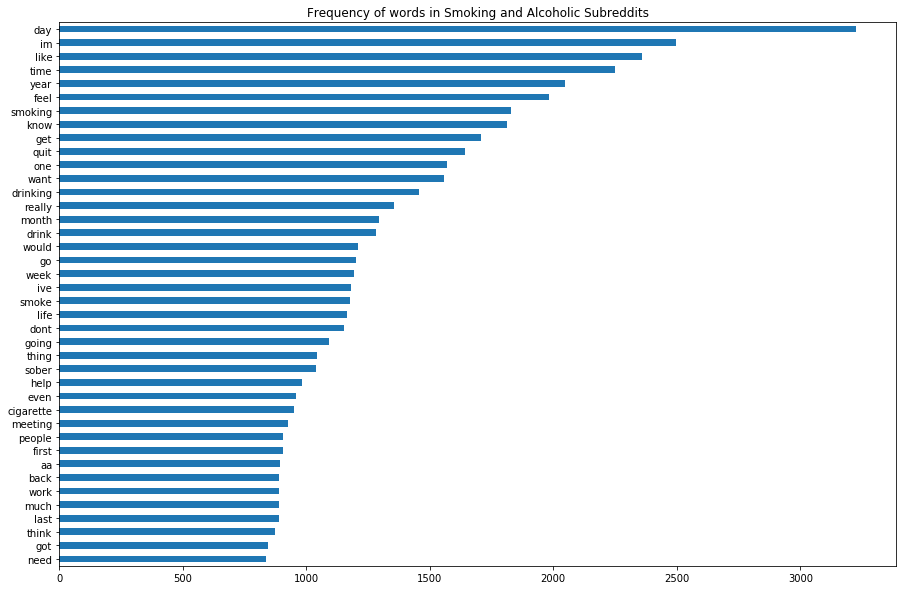

In [12]:
plt.figure(figsize = (15,10))

X_counts_df.sum().sort_values(ascending = True).tail(40).plot(kind = 'barh', title='Frequency of words in Smoking and Alcoholic Subreddits');

Yikes, appears there are several additional words we need to remove as stop words. Let's add the irrelevant words into our stopwords to see if it yields a better result.

These are the words to be removed:  
day, im, like, time, year, feel, get, one, want, month, really, would, go, week, ive, dont, going, thing, even, of, my  meeting, people, first, aa, back, work, much, last, think, got, need, the

C:\Users\ACCEP7ANCE\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


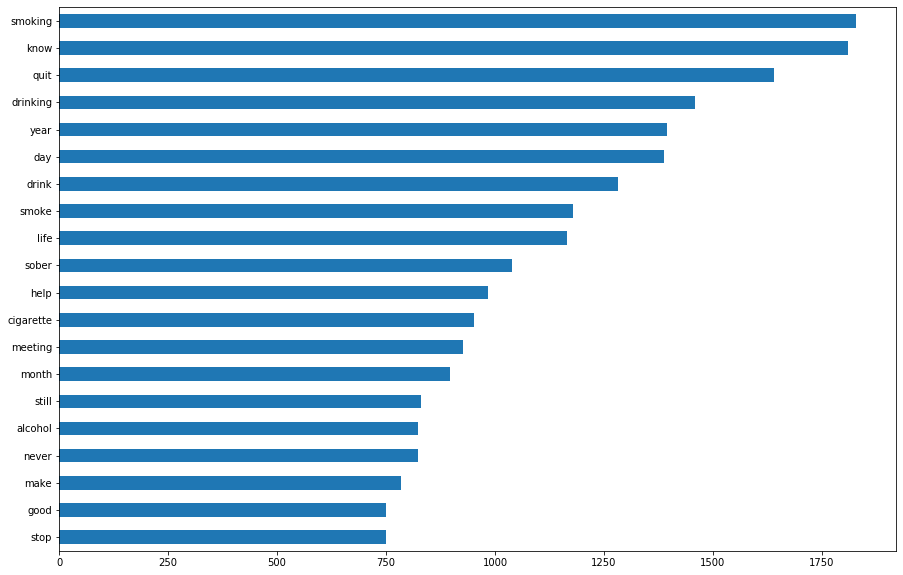

In [13]:
new_stopwords = ['day', 'im', 'like', 'time', 'year', 'feel', 'get', 'one', 'want', 'month', 'really', 'would','go','week','ive','dont','going','thing','even', 'of', 'my' 'meeting', 'people', 'first', 'aa', 'back','work','much','last','think','got','need','the']
add_stopwords = nltk.corpus.stopwords.words('english') + new_stopwords

count_vect = count_vect = CountVectorizer(analyzer=clean_text_lemmatize_more_stopwords)


X_counts = count_vect.fit_transform(data_nopunct['selftext_title'])


X_counts_df = pd.DataFrame(count_vect.fit_transform(data_nopunct['selftext_title']).todense(), columns = count_vect.get_feature_names())


plt.figure(figsize = (15,10))

X_counts_df.sum().sort_values(ascending = True).tail(20).plot(kind = 'barh');

Now this plot makes more sense.

A few insights we can gather from this post. We can tell that posts that typically contains cigarette or smoke are very likely from the smoking subreddit, whereas sober, alcohol and drinking are likely from the alcoholic subreddits. These words are very useful for us to sort the posts out and can be used in our model for further evaluation and predictions.

## Apply N-Gram CountVectorizer (2,3)

Let's Apply N-Gram CountVectorizer as well with (2,3) parameter.

In [14]:
ngram_vect = CountVectorizer(ngram_range=(2,3))
X_counts_ngram = ngram_vect.fit_transform(data_nopunct['selftext_title'])
# Apply our N-gram vectorizer with 2,3 parameter before fitting it into our vectorised data

In [15]:
X_counts_df_ngram = pd.DataFrame(X_counts_ngram.toarray())
X_counts_df_ngram.columns = ngram_vect.get_feature_names()
# Save our (2,3) vectorized data into our a dataframe

C:\Users\ACCEP7ANCE\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Now will be an good time to view our most common 2-3 word phrases in our data.

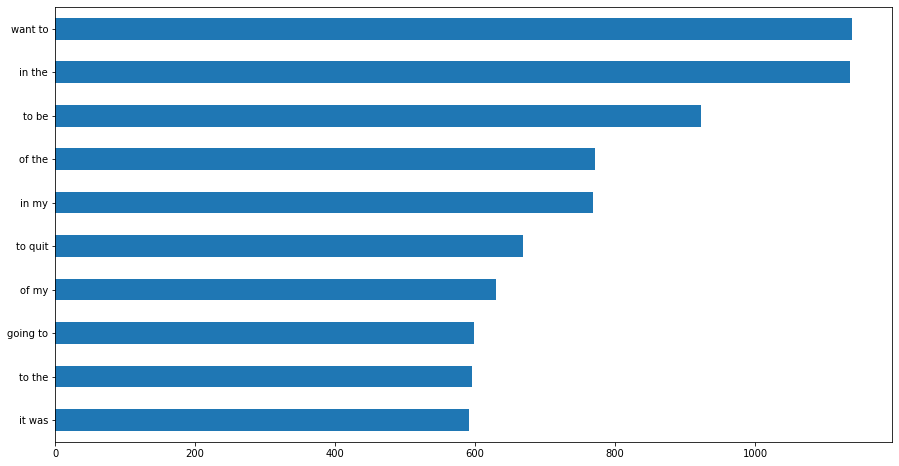

In [16]:
plt.figure(figsize = (15,8))

X_counts_df_ngram.sum().sort_values(ascending = True).tail(10).plot(kind = 'barh');

It also appears that most people with smoking or alcholic problems might want to quit their habits too. This falls in line with a lot of our observations in rehabilitation centers

** Need to troubleshoot why our cleaning function is not cleaning up our stopwords **

## Apply TF-DIF Vectorization 
Let's also apply Term Frequency–Inverse Document Frequency (TF-IDF) vectorization to our data so that we can get a better gage of our model later. 

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text_lemmatize_more_stopwords)
X_tfidf = tfidf_vect.fit_transform(data_nopunct['selftext_title'])
# Apply TF-DIF vectorization to our data, and then fit it into a data variable

In [18]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
# Send our fitted data into our DataFrame

C:\Users\ACCEP7ANCE\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


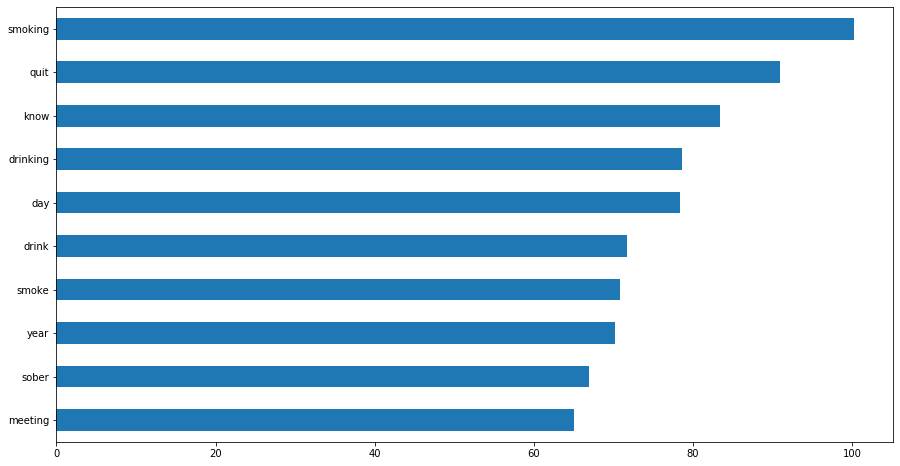

In [19]:
plt.figure(figsize = (15,8))

X_tfidf_df.sum().sort_values(ascending = True).tail(10).plot(kind = 'barh');

# Baseline Model
--- 
Our baseline model is by looking at the proportions of post in one category, deciding if it belongs to one category by looking at the majority of the data.

In [23]:
y.value_counts(normalize = True)
# Baseline Model (Percentage of one over the other)

1    0.556701
0    0.443299
Name: subreddit, dtype: float64

This indicates to us that our dataset is likely to be alcoholic as there are more 1 (Alcoholic) than 0 (Smoking). Let's evaluate our prediction metrics based on our baseline model.

In [69]:
# Baseline Model Metrics code

# Train Our Models
---

Let's start training our model to make a prediction.

### Import Our Model Libraries

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

## Testing with Count Vectorized Data (1,1)

Let's start by testing our model with our (1,1) count Vectorized data on our 2 models, namely Naive Bayes (Bernoulli, Multinomial and Gaussian) and KNN Model.

### Loading our Count Vectorised Data into our X and Y sets

In [68]:
X = X_counts_df
y = data['subreddit']

### Train test and split our data into an 80/20 set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### Using Bernoulli Naive Bayes

In [24]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

BernoulliNB(binarize=True)
0.8348484848484848


In [25]:
y_pred_train = BernNB.predict(X_train)

print(accuracy_score(y_train, y_pred_train))
# Train Data Metric

0.8536770280515542


### Using Multinomial Naive Bayes

In [26]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)


y_pred = MultiNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))
#Test Data Metric

MultinomialNB()
0.953030303030303


In [27]:
y_pred_train = MultiNB.predict(X_train)

print(accuracy_score(y_train, y_pred_train))

# Train Data Metric

0.9874905231235784


### Using Gaussian Naive Bayes

In [28]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)


y_pred = GausNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

GaussianNB()
0.7621212121212121


In [29]:
y_pred_train = GausNB.predict(X_train)

print(accuracy_score(y_train, y_pred_train))

0.9916603487490523


### Optimised Bernoulli Naive Bayes

In [30]:
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

BernoulliNB(binarize=0.1)
0.9196969696969697


In [31]:
y_pred_train = BernNB.predict(X_train)

print(accuracy_score(y_train, y_pred_train))

0.9594389689158453


## KNN

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=40)

## Cross Validation

In [34]:
cross_val_score(knn, X_train, y_train, cv=5).mean()

0.8514001495026162

In [35]:
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9245640636846095

In [36]:
knn.score(X_test, y_test)

0.8742424242424243

## Testing with (2,3) N-Gram Vectorizing

In [38]:
X = X_counts_df_ngram
y = data['subreddit']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Using Bernoulli Naive Bayes to predict Subreddits

In [40]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

BernoulliNB(binarize=True)
0.5863636363636363


In [41]:
y_pred_train = BernNB.predict(X_train)

print(accuracy_score(y_train, y_pred_train))
# Train Data Metric

0.5496588324488249


## Using Multinomial Naive Bayes to predict Subreddits

In [42]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)


y_pred = MultiNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))
#Test Data Metric

MultinomialNB()
0.8939393939393939


In [43]:
y_pred_train = MultiNB.predict(X_train)

print(accuracy_score(y_train, y_pred_train))

# Train Data Metric

0.9996209249431387


## Using Gaussian Naive Bayes to predict Subreddits

In [44]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)


y_pred = GausNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

GaussianNB()
0.8939393939393939


In [45]:
y_pred_train = GausNB.predict(X_train)

print(accuracy_score(y_train, y_pred_train))

0.9988627748294162


## Optimised Bernoulli Naive Bayes

In [46]:
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

BernoulliNB(binarize=0.1)
0.8257575757575758


In [47]:
y_pred_train = BernNB.predict(X_train)

print(accuracy_score(y_train, y_pred_train))

0.966262319939348


## KNN

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=40)

## Cross Validation

In [50]:
cross_val_score(knn, X_train, y_train, cv=5).mean()

0.47876559714795014

In [51]:
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.5053070507960576

In [52]:
knn.score(X_test, y_test)

0.4212121212121212

## Testing with TF-DIF Vectorizing

In [53]:
X = X_tfidf_df
y = data['subreddit']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Using Bernoulli Naive Bayes to predict Subreddits

In [55]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

BernoulliNB(binarize=True)
0.5863636363636363


In [56]:
y_pred_train = BernNB.predict(X_train)

print(accuracy_score(y_train, y_pred_train))
# Train Data Metric

0.5492797573919637


## Using Multinomial Naive Bayes to predict Subreddits

In [57]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)


y_pred = MultiNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))
#Test Data Metric

MultinomialNB()
0.9606060606060606


In [58]:
y_pred_train = MultiNB.predict(X_train)

print(accuracy_score(y_train, y_pred_train))

# Train Data Metric

0.9909021986353298


## Using Gaussian Naive Bayes to predict Subreddits

In [59]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)


y_pred = GausNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

GaussianNB()
0.7424242424242424


In [60]:
y_pred_train = GausNB.predict(X_train)

print(accuracy_score(y_train, y_pred_train))

0.9916603487490523


## Optimised Bernoulli Naive Bayes

In [61]:
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

BernoulliNB(binarize=0.1)
0.9363636363636364


In [62]:
y_pred_train = BernNB.predict(X_train)

print(accuracy_score(y_train, y_pred_train))

0.9886277482941622


## KNN

In [63]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn = KNeighborsClassifier(n_neighbors=40)

## Cross Validation

In [65]:
cross_val_score(knn, X_train, y_train, cv=5).mean()

0.9617172675521821

In [66]:
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9658832448824868

In [67]:
knn.score(X_test, y_test)

0.953030303030303